# Pseudo-random Numbers

#### Wish to estimate $\alpha = P(U \le 0.6)$, where U is uniformly distributed on (0,1). Clearly $\alpha$ = 0.6, but suppose that we don't know that and instead use simulation. Our random numbers will come from the LCG x<sub>n+1</sub> = (17$x_n$ + 13) mod 23.

Use this LCG to generate a sequesnce pseudo random uniform (0,1) random numbers starting with seed $x_0$ = 2. Give an estimate for $\alpha$ based on 10, 20, 200, and 2000 pseudo-random numbers.

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# code is based off of code from Recitation 3
a = 17
c = 13
m = 23

n_list = [10,20,200,2000]

for n in n_list:
    X=np.empty(n)
    X[0] = 2 
    
    for i in range (1,n):
        X[i] = np.mod(a*X[i-1] + c, m)
        
    alpha = (sum((X+1)/(m+1)<=0.6))/float(n)
    
    print ("For n=" + str(n) + " the alpha value is "+str(alpha)+".")

For n=10 the alpha value is 0.6.
For n=20 the alpha value is 0.7.
For n=200 the alpha value is 0.64.
For n=2000 the alpha value is 0.637.


#### Limit of the estimate obtained from the first n pseudo-random numbers produces as n -> infinity.

In [4]:
print (np.where(X==2)[0]) 
#period is 22
print (np.sum(((X[:22]+1.0)/(m+1))<=0.6))
#total <= 0.6 in one period is 14
print (14./22)

[   0   22   44   66   88  110  132  154  176  198  220  242  264  286  308
  330  352  374  396  418  440  462  484  506  528  550  572  594  616  638
  660  682  704  726  748  770  792  814  836  858  880  902  924  946  968
  990 1012 1034 1056 1078 1100 1122 1144 1166 1188 1210 1232 1254 1276 1298
 1320 1342 1364 1386 1408 1430 1452 1474 1496 1518 1540 1562 1584 1606 1628
 1650 1672 1694 1716 1738 1760 1782 1804 1826 1848 1870 1892 1914 1936 1958
 1980]
14
0.6363636363636364


14 of the numbers in the period of 22 will count toward the probability estimate. Therefore 14/22= 0.636 is the limiting probability estimate. 

#### In order to avoid biases, simulations should not use anywhere near the full period of an LCG. This creates a problem for some large simulation, which need a lot of random variables. We will now see a method to combine multiple LCGs to obtain a generator with a longer period. 
The main idea for increasing the period of an LCG is to add a smaller period LCG to it. 

In [5]:
# CODE FROM PRNGs.ipynb

# Function to generate pseudorandom sequence using LCG
# Setting default parameters to glibc specifications (without truncation)

def LCG(n,m = 2**31-1,a = 1103515245,c = 12345,x_0 = 1):
    output = np.zeros(n)

    x = x_0
    for i in range(n):
        output[i] = (x+1.0)/(m+1.0)
        x = (a*x+c)%m

    return output

# Functions to visualize LCG sequence on clock
def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')


def plot_clock_path(m,x,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(x[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')
    
    # Plot the path of the LCG sequence
    for i in range(len(x)-1):
        theta_start = 2.0*np.pi*(x[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(x[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y, 
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)    

#### Consider two LCGs, x<sub>n+1</sub> = (5$x_n$) mod 16 and y<sub>n+1</sub> = (2$y_n$) mod 7. Starting both with seed $x_0$ = $y_0$ = 1, plot the sequences $x_n$, $y_n$, using the clock visualization introduced in class (one separate plot for eah sequence).

##### x <sub>n</sub> SEQUENCE

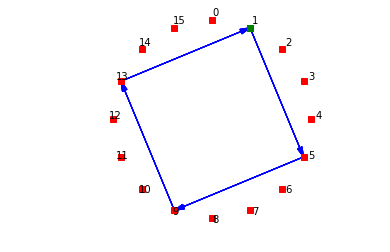

In [6]:
#Code based off of PRNGs.ipynb

m = 16
a = 5
c = 0
x_0=1
n=m+1

fig = plt.figure()
x = LCG(n,m,a,c,x_0)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
plt.axis('equal')
plt.axis('off')
plt.show()

##### y <sub>n</sub> SEQUENCE

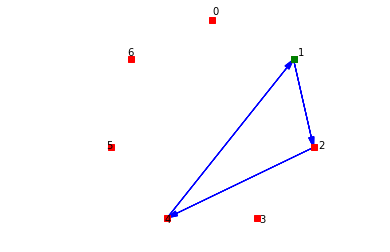

In [8]:
#Code based off of PRNGs.ipynb

m = 7
a = 2
c = 0
x_0=1
n= m+1

fig = plt.figure()
x = LCG(n,m,a,c,x_0)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
plt.axis('equal')
plt.axis('off')
plt.show()

#### Next, define a combined LCG as $z_n$ = ($x_n$ + $y_n$) mod 16. Starting both the base LCGs with seed $x_0$ = $y_0$ = 1, plot the sequence $z_n$ using the clock visualization.

In [9]:
#based on LCG function from PRNGs.ipynb
def Combined_LCG(n,m, x_0, y_0, x_a, y_a, x_c, y_c, x_m, y_m):
    output = np.zeros(n)

    x = x_0
    y = y_0
    for i in range(n):
        output[i] = (x+y+1.)/(m+1.) #Z= (X + Y) mod m
        x = (x_a*x+x_c)%x_m
        y = (y_a*y+y_c)%y_m
        
    return output

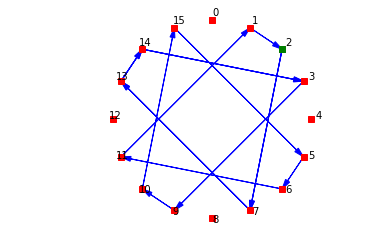

In [10]:
m = 16
x_0 = 1
y_0 = 1
x_a = 5
y_a = 2
x_c = 0
y_c = 0
x_m = 16
y_m = 7
n = m+1

fig = plt.figure()
x = Combined_LCG(n ,m, x_0, y_0, x_a, y_a, x_c, y_c, x_m, y_m)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
plt.axis('equal')
plt.axis('off')
plt.show()

Based on the plots, the periods for the sequences are as follows:

$x_n$: 4

$y_n$: 3

$z_n$: 12

#### Some modern random number generators have a massive period. such long period generators can be used to generate pseudorandom streams for parallel simulations. 

#### To be able to generate streams efficiently, we need to be able to identify the seeds corresponding to the first values of the streams we use. To find those, we can start with the seed corresponding to the start of the first stream. Let us arbitrarly take that seed equal to $x_0$ = 3. To find the seed corresponding to the start of the second stream. Steeping forward through the sequence one number at a time would take too long. In this question we figure out a fast way to jump ahead in the sequqnce. We assume that we can multiply exactly any two integers that are smaller than m.

#### Suppose we have a multipicative generator x<sub>n+1</sub>=a($x_n$) mod m where a < m. We will use the fact that $x_n$ = ($a^nx_0$) mod m and that

#### $ x_n  = ((a^n $ mod m) $x_0$) mod m    for all $n \ge 1$. 

#### Take a = $7^5$ = 16,807 and m = 2<sup>31</sup> - 1= 2,147,483,647. Devise a method to compute $x_n$ quickly when n=2<sup>138</sup>.

In [12]:
a = 7**5
m = 2**31 - 1
n = 2**138
x=a
#x_0 = 3

for i in range(138):
    x = (x**2)%m

#print x
print ((x*3)%m)

1946723422


By taking $x^2$ 138 times starting with x=a, we eventually raise a to the 2<sup>138</sup> power. I take the mod m of x after each iteration since we can multiply exactly any two integers that are smaller than m and times the iteration result by $x_0$ and mod m since $ x_n  = ((a^n $ mod m) $x_0$) mod m    for all $n \ge 1$. The output of my code is 1946723422 which represents the value of $x_n$ that we found. 